# pandas의 read_html 함수를 통한 크롤링

- pandas의 read_html함수를 통해 웹 상에 있는 table형식의 데이터를 긁어와보겠습니다.
- 네이버 금융에서 삼성전자의 시간별 시세의 데이터를 얻어보도록 하겠습니다.

-------------------------- 
**1. 먼저 [네이버금융](#https://finance.naver.com/)에 삼성전자를 검색한 후 시세 탭을 누릅니다.**  
 
**2. 원하는 테이블의 url 을 알기 위해 F12를 누르고 newwork탭에 들어가 해당 테이블의 url을 찾은 뒤 복사합니다.** 
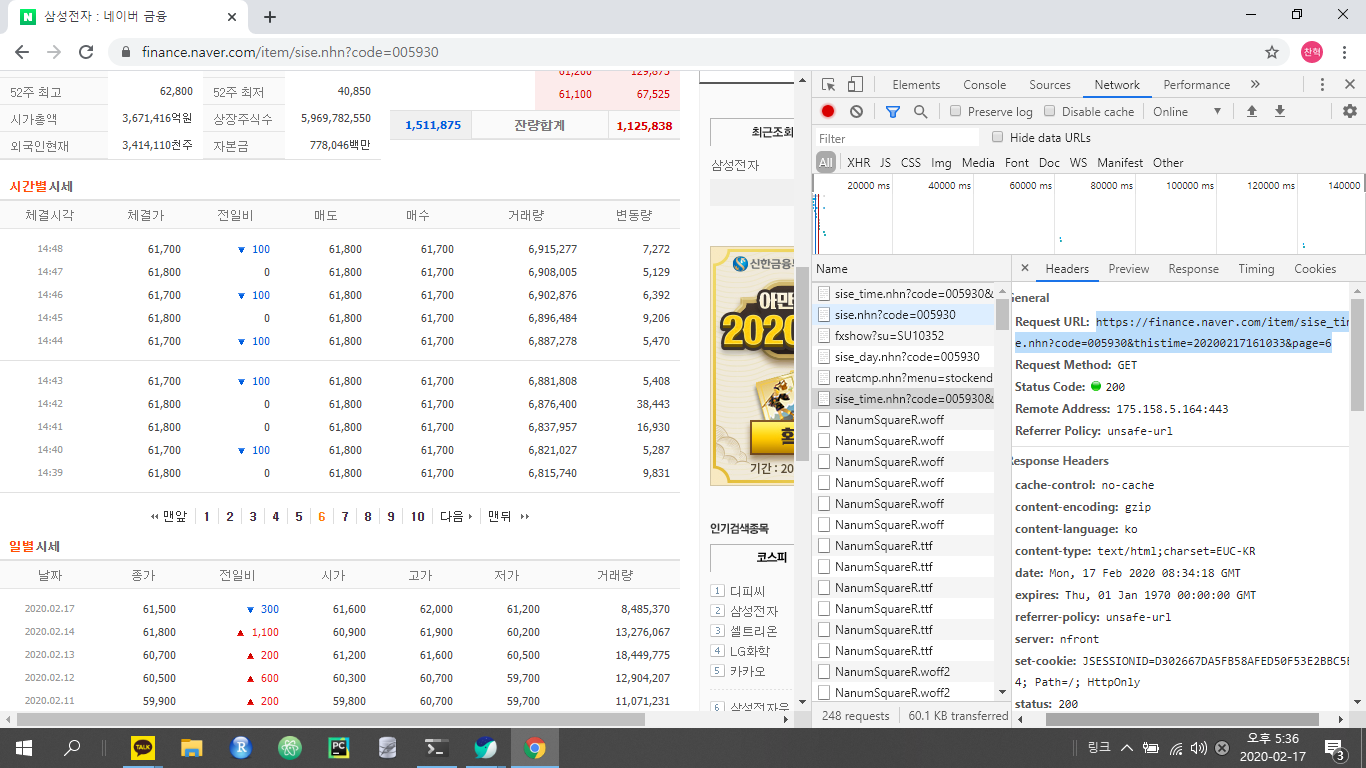

In [43]:
import pandas as pd #pandas 라이브러리 loading

url = "https://finance.naver.com/item/sise_time.nhn?code=005930&thistime=20200217161033&page=6" # url 저장 

In [29]:
result = pd.read_html(url) # read_html 을 이용해 테이블 불러오기 
result[0] #첫번째 데이터만 필요하므로 0번째 데이터만 출력합나다.

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.02.17,61500.0,300.0,61600.0,62000.0,61200.0,8485370.0
2,2020.02.14,61800.0,1100.0,60900.0,61900.0,60200.0,13276067.0
3,2020.02.13,60700.0,200.0,61200.0,61600.0,60500.0,18449775.0
4,2020.02.12,60500.0,600.0,60300.0,60700.0,59700.0,12904207.0
5,2020.02.11,59900.0,200.0,59800.0,60700.0,59700.0,11071231.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020.02.10,59700.0,700.0,59200.0,59800.0,59100.0,13107121.0


- 결측치가 존재하므로 dropna를 통해 결측치를 제거 할수 있습니다. 
------------------
# 여러 페이지를 for문을 사용해 불러오기 

- 여러페이지의 데이터를 한번에 긁어와 하나의 데이터로 만들어 보겠습니다. 

In [54]:
pages = [i for i in range(40, 0, -1)] # page가 작을수록 최신 데이터이므로 큰 page부터 긁어오겠습니다. 네이버금융기준으 하루 거래량을 총 40페이지로 나누어져있습니다.

result_df = pd.DataFrame() #빈 데이터프레임 

for page in pages :
    url ="https://finance.naver.com/item/sise_time.nhn?code=005930&thistime=20200217161033&page=" + str(page) # for문이 돌아가는 동안 새로운 url을 만들어줍니다.
    result = pd.read_html(url) #해당 page의 데이터 저장
    result = pd.DataFrame(result[0]) #데이터 프레임 형식으로 변환
    result = result[::-1] #각 페이지엔 최신 데이터가 맨위에 있으므로 데이터프레임을 역순으로 재배열 
    result_df = pd.concat([result_df, result.dropna()], axis = 0, ignore_index = True)   #데이터프레임 위아래로 합치기, index를 리셋  
    
result_df #결과를 출력 

result_df

,체결시각,체결가,전일비,매도,매수,거래량,변동량
0,09:00,61600.0,200.0,61600.0,61500.0,317202.0,317202.0
1,09:01,61400.0,400.0,61500.0,61400.0,435786.0,118584.0
2,09:02,61500.0,300.0,61600.0,61500.0,505665.0,69879.0
3,09:03,61600.0,200.0,61600.0,61500.0,539667.0,34002.0
4,09:04,61600.0,200.0,61600.0,61500.0,560290.0,20623.0
...,...,...,...,...,...,...,...
394,15:53,61500.0,300.0,61600.0,61500.0,8482672.0,44.0
395,15:54,61500.0,300.0,61600.0,61500.0,8484657.0,1985.0
396,15:56,61500.0,300.0,61600.0,61500.0,8484833.0,176.0
397,15:57,61500.0,300.0,61600.0,61500.0,8485333.0,500.0


----------
**BeautifulSoup을 이용하지않고 pandas의 read_html을 통해 쉽게 데이터를 긁어올 수 있다는것을 배웠습니다.**  
**네이버 금융 url-https://finance.naver.com/item/sise_time.nhn?code=005930&thistime=20200217161033&page=6 을 살펴보면 파라미터인 code,thistime,page 적절히 설정을 해준다면 다른 기업과 다른 시점에서의 주가도 편하게 가져올수 있습니다.**